In [2]:
import os
import sys

sys.path.append('/usr/local/p8/katydid/v2.14.0')

import ROOT
import CicadaPy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from ReadKTOutputFile import *

cwd = os.getcwd()
cwd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Info about this run, where data is, where plots should be stored, etc.

rootfile = '/host/run7427/7427_concat.root'
#rootfile = '/Users/elisenovitski/Project8/docker_share/sierra/run7427/events_or_sparse_7427.root'
savefilepath = '/host/run7427/'
#savefilepath = '/Users/elisenovitski/Project8/docker_share/sierra/analysis'
conditions = 'Run 7427, 7e-7 torr'
runnumber = 7427
thisRunPressure = 7e-7 #torr

# Importing data from the .root file outputted by Katydid
startFrequencies = np.array(ReadKTOutputFile(rootfile,'StartFrequency'))
endFrequencies = np.array(ReadKTOutputFile(rootfile,'EndFrequency'))
startTimesInRun = np.array(ReadKTOutputFile(rootfile,'StartTimeInRunC'))
endTimesInRun = np.array(ReadKTOutputFile(rootfile,'EndTimeInRunC'))
startTimesInAcq = np.array(ReadKTOutputFile(rootfile,'StartTimeInAcq'))
firstTrackSlopes = np.array(ReadKTOutputFile(rootfile,'FirstTrackSlope'))
firstTrackTimeLengths = np.array(ReadKTOutputFile(rootfile,'FirstTrackTimeLength'))
eventTimeLengths = np.array(ReadKTOutputFile(rootfile,'TimeLength'))
firstTrackTotalPowers = np.array(ReadKTOutputFile(rootfile,'FirstTrackTotalPower'))
firstTrackNBins = np.array(ReadKTOutputFile(rootfile,'FirstTrackNTrackBins'))
firstTrackTotalSNR = np.array(ReadKTOutputFile(rootfile,'FirstTrackTotalSNR'))

# Calculating other quantities from this data
firstTrackAveragePowers = firstTrackTotalPowers/firstTrackTimeLengths
jumpLengths=startTimesInRun[1:len(endTimesInRun)]-endTimesInRun[0:len(endTimesInRun)-1]
jumpSizes=startFrequencies[1:len(startFrequencies)]-endFrequencies[0:len(startFrequencies)-1]
avgSNRPerBin=firstTrackTotalSNR[0:len(firstTrackNBins)]/firstTrackNBins[0:len(firstTrackNBins)]
avgPowerPerBin=firstTrackTotalPowers[0:len(firstTrackNBins)]/firstTrackNBins[0:len(firstTrackNBins)]

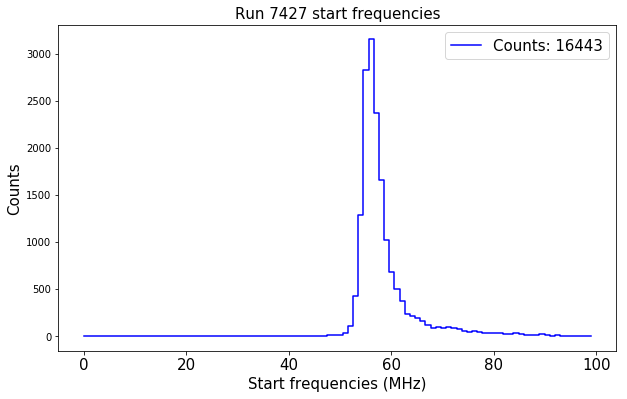

In [4]:
bins=np.linspace(0, 100, 100)
n_startFrequencies,bins = np.histogram(startFrequencies*1e-6,bins = bins)

plt.figure(figsize=(10,6))
plt.step(bins[0:-1],n_startFrequencies, color='blue', label='Counts: {}'.format(len(list(startFrequencies))))
plt.xlabel('Start frequencies (MHz)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.title('Run '+str(runnumber)+' start frequencies',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
#plt.xlim(40,80)
plt.savefig(savefilepath+'StartFrequencies.png')

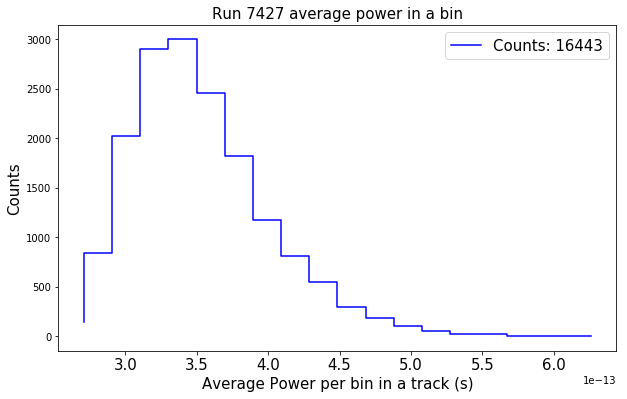

In [5]:
bins=np.linspace(np.min(avgPowerPerBin), np.max(avgPowerPerBin), 20)
n_avgPowerPerBin,bins = np.histogram(avgPowerPerBin,bins = bins)

plt.figure(figsize=(10,6))
plt.step(bins[0:-1],n_avgPowerPerBin, color='blue', label='Counts: {}'.format(len(list(avgPowerPerBin))))
plt.xlabel('Average Power per bin in a track (s)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.title('Run '+str(runnumber)+' average power in a bin',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
#plt.xlim(40,80)
plt.savefig(savefilepath+'AvgPowerPerBin.png')

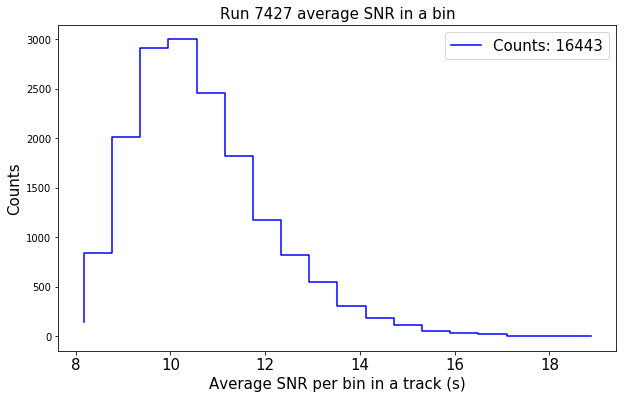

In [6]:
bins=np.linspace(np.min(avgSNRPerBin), np.max(avgSNRPerBin), 20)
n_avgSNRPerBin,bins = np.histogram(avgSNRPerBin,bins = bins)

plt.figure(figsize=(10,6))
plt.step(bins[0:-1],n_avgSNRPerBin, color='blue', label='Counts: {}'.format(len(list(avgSNRPerBin))))
plt.xlabel('Average SNR per bin in a track (s)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.title('Run '+str(runnumber)+' average SNR in a bin',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
#plt.xlim(40,80)
plt.savefig(savefilepath+'AvgSNRPerBin.png')

In [7]:
print('Average signal power for a track is:',np.mean(avgPowerPerBin))
print('Average noise power is:', np.mean(avgPowerPerBin/avgSNRPerBin))

print('\nMaximum signal average signal power for a track is:', np.max(avgPowerPerBin))
print('Minimum signal average signal power for a track is:', np.min(avgPowerPerBin))

print('\nAverage SNR is:',np.mean(avgSNRPerBin))

print('\nMaximum signal average SNR for a track is:', np.max(avgSNRPerBin))
print('Minimum signal average SNR for a track is:', np.min(avgSNRPerBin))


Average signal power for a track is: 3.726673794047454e-13
Average noise power is: 3.3156558655318393e-14

Maximum signal average signal power for a track is: 6.457219720560567e-13
Minimum signal average signal power for a track is: 2.710006309627059e-13

Average SNR is: 11.239627446026898

Maximum signal average SNR for a track is: 19.47356548393687
Minimum signal average SNR for a track is: 8.170890883247406


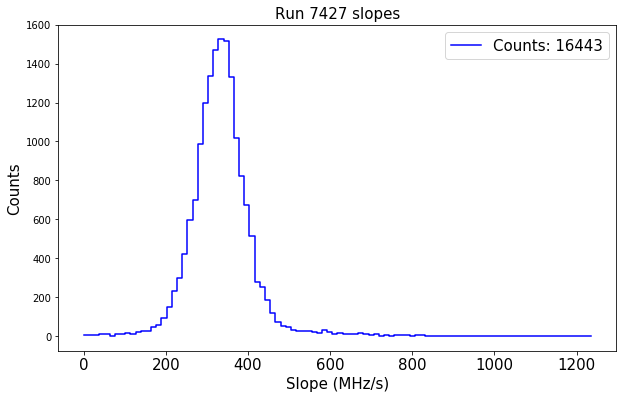

In [8]:
bins=np.linspace(np.min(firstTrackSlopes*1e-6), np.max(firstTrackSlopes*1e-6), 100)
n_firstTrackSlopes,bins = np.histogram(firstTrackSlopes*1e-6,bins = bins)

plt.figure(figsize=(10,6))
plt.step(bins[0:-1],n_firstTrackSlopes, color='blue', label='Counts: {}'.format(len(list(startFrequencies))))
plt.xlabel('Slope (MHz/s)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.title('Run '+str(runnumber)+' slopes',fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
#plt.xlim(1,80)
#plt.ylim(0,100)
plt.savefig(savefilepath+'Slopes.png')

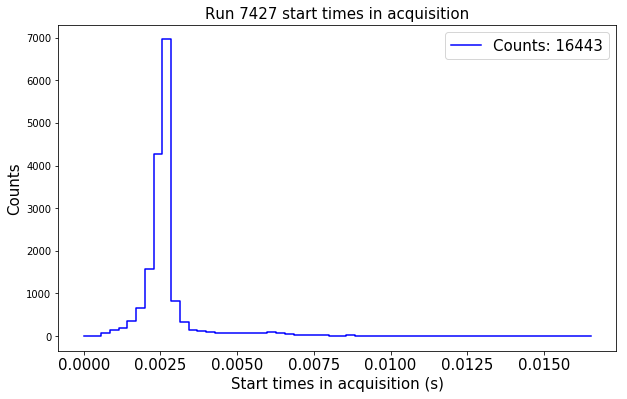

In [9]:
bins=np.linspace(0.00, np.max(startTimesInAcq), 60)
n_startTimesInAcq,bins = np.histogram(startTimesInAcq,bins = bins)

plt.figure(figsize=(10,6))
plt.step(bins[0:-1],n_startTimesInAcq, color='blue', label='Counts: {}'.format(len(list(startFrequencies))))
plt.xlabel('Start times in acquisition (s)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.title('Run '+str(runnumber)+' start times in acquisition',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
#plt.xlim(40,80)
plt.savefig(savefilepath+'StartTimesInAcq.png')

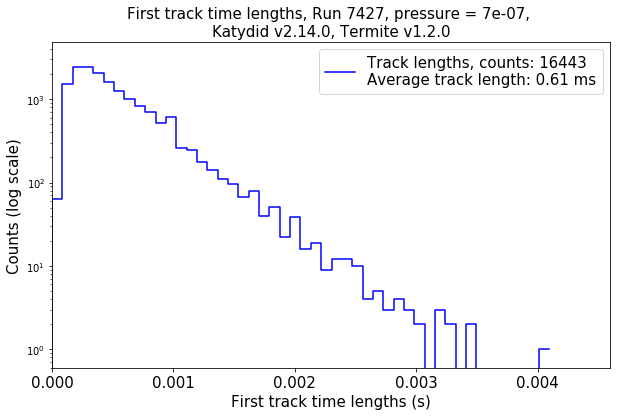

In [10]:
def estimateFirstTrackLengths(firstTrackTimeLengths, thisRunPressure, runnumber, nbins, lowercutofftime, uppercutofftime, config):

    xmax = np.max(firstTrackTimeLengths)
    bins=np.linspace(0, xmax, nbins)
    n_firstTrackTimeLengths,bins = np.histogram(firstTrackTimeLengths,bins = bins)
    ymax = np.max(n_firstTrackTimeLengths)
        
    n_firstTrackTimeLengths_errs = list(map(float, n_firstTrackTimeLengths.copy()))
    n_firstTrackTimeLengths_variances = list(map(float, n_firstTrackTimeLengths.copy()))
    for i in range (0, len(n_firstTrackTimeLengths)):
        if n_firstTrackTimeLengths[i] == 0:
            n_firstTrackTimeLengths_errs[i] = 1
            n_firstTrackTimeLengths_variances[i] = 1
        else:
            q = np.sqrt(n_firstTrackTimeLengths[i])
            n_firstTrackTimeLengths_errs[i] = float(q)

    avgDetectedTrackLength = 1000*np.mean(list(firstTrackTimeLengths))    
    plt.figure(figsize=(10,6))
    plt.step(bins[0:-1],n_firstTrackTimeLengths, color='blue', label='Track lengths, counts: {}\nAverage track length: {} ms'.format(len(firstTrackTimeLengths),np.round(avgDetectedTrackLength,2)))
    plt.xlabel('First track time lengths (s)',fontsize=15)
    plt.ylabel('Counts (log scale)',fontsize=15)
    plt.title('First track time lengths, Run '+str(runnumber)+', pressure = '+str(thisRunPressure)+', '+config,fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=15)
    plt.yscale('log')
    plt.xlim(0,xmax*1.1)
    plt.ylim(0.6,ymax*2)

    return

estimateFirstTrackLengths(firstTrackTimeLengths, 7e-7, 7427, 50, .001, .003, '\nKatydid v2.14.0, Termite v1.2.0')

0.21264340425532244 9.994240000000154 0.21264340425532244 9.994240000000154


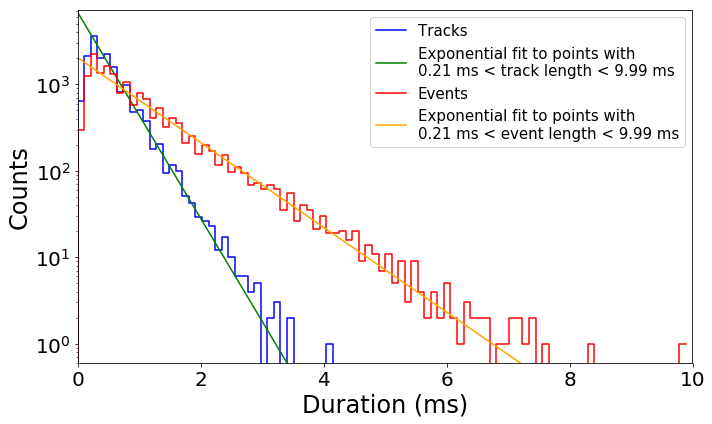

In [11]:
def estimateFirstTrackLengthsPlusEventsDNPWithLabels(firstTrackTimeLengths, timeLengths, nbins, lowercutofftime_tracks, uppercutofftime_tracks, lowercutofftime_events, uppercutofftime_events, plotnamestring):

    xmax = 1000*np.max([np.max(firstTrackTimeLengths),np.max(timeLengths)])
    bins=np.linspace(0, xmax, nbins)
    n_firstTrackTimeLengths,bins = np.histogram(firstTrackTimeLengths*1000,bins = bins)
    n_timeLengths,bins = np.histogram(timeLengths*1000,bins = bins)
    ymax = np.max([np.max(n_firstTrackTimeLengths),np.max(n_timeLengths)])

    lowercutoffbin_tracks = (np.abs(np.array(bins)-lowercutofftime_tracks)).argmin() #lower cutoff bin
    uppercutoffbin_tracks = (np.abs(np.array(bins)-uppercutofftime_tracks)).argmin() #upper cutoff bin
    actuallotime_tracks = bins[lowercutoffbin_tracks]
    actualhitime_tracks = bins[uppercutoffbin_tracks]
    
    lowercutoffbin_events = (np.abs(np.array(bins)-lowercutofftime_events)).argmin() #lower cutoff bin
    uppercutoffbin_events = (np.abs(np.array(bins)-uppercutofftime_events)).argmin() #upper cutoff bin
    actuallotime_events = bins[lowercutoffbin_events]
    actualhitime_events = bins[uppercutoffbin_events]
    
    n_firstTrackTimeLengths_errs = list(map(float, n_firstTrackTimeLengths.copy()))
    n_firstTrackTimeLengths_variances = list(map(float, n_firstTrackTimeLengths.copy()))
    for i in range (0, len(n_firstTrackTimeLengths)):
        if n_firstTrackTimeLengths[i] == 0:
            n_firstTrackTimeLengths_errs[i] = 1
            n_firstTrackTimeLengths_variances[i] = 1
        else:
            q = np.sqrt(n_firstTrackTimeLengths[i])
            n_firstTrackTimeLengths_errs[i] = float(q)
            
    track_length_fit = curve_fit(lambda t,a,b: a*np.exp(b*t), list(bins[0:-1])[lowercutoffbin_tracks:uppercutoffbin_tracks], list(n_firstTrackTimeLengths)[lowercutoffbin_tracks:uppercutoffbin_tracks], p0=(3866, -(826/1000)), sigma=n_firstTrackTimeLengths_variances[lowercutoffbin_tracks:uppercutoffbin_tracks])
    track_length_fitpoints = [track_length_fit[0][0]*math.exp(track_length_fit[0][1]*i) for i in bins[0:-1]]   
    track_length_pointsinfit=sum(list(n_firstTrackTimeLengths)[lowercutoffbin_tracks:uppercutoffbin_tracks])
            
    n_timeLengths_errs = list(map(float, n_timeLengths.copy()))
    n_timeLengths_variances = list(map(float, n_timeLengths.copy()))
    for i in range (0, len(n_timeLengths)):
        if n_timeLengths[i] == 0:
            n_timeLengths_errs[i] = 1
            n_timeLengths_variances[i] = 1
        else:
            q = np.sqrt(n_timeLengths[i])
            n_timeLengths_errs[i] = float(q)

    event_length_fit = curve_fit(lambda t,a,b: a*np.exp(b*t), list(bins[0:-1])[lowercutoffbin_events:uppercutoffbin_events], list(n_timeLengths)[lowercutoffbin_events:uppercutoffbin_events], p0=(3866, -(826/1000)), sigma=n_timeLengths_variances[lowercutoffbin_events:uppercutoffbin_events])
    event_length_fitpoints = [event_length_fit[0][0]*math.exp(event_length_fit[0][1]*i) for i in bins[0:-1]]   
    event_length_pointsinfit=sum(list(n_timeLengths)[lowercutoffbin_events:uppercutoffbin_events])
    
    avgDetectedTrackLength = 1000*np.mean(list(firstTrackTimeLengths))    
    avgDetectedEventLength = 1000*np.mean(list(timeLengths))    
    plt.figure(figsize=(10,6))
    plt.step(bins[0:-1],n_firstTrackTimeLengths, color='blue', label='Tracks')
    plt.plot(bins[0:-1],track_length_fitpoints, color='green', label='Exponential fit to points with\n{} ms < track length < {} ms'.format(round(actuallotime_tracks,2),round(actualhitime_tracks,2)))
    plt.step(bins[0:-1],n_timeLengths, color='red', label='Events')
    plt.plot(bins[0:-1],event_length_fitpoints, color='orange', label='Exponential fit to points with\n{} ms < event length < {} ms'.format(round(actuallotime_events,2),round(actualhitime_events,2)))
    
    plt.xlabel('Duration (ms)',fontsize=24)
    plt.ylabel('Counts',fontsize=24)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.yscale('log')
    plt.xlim(0,xmax)
    plt.ylim(0.6,ymax*2)
    plt.tight_layout()
    #plt.savefig(savefilepath + 'track_event_lengths_DNP_with_fits_with_labels_20181018'+ plotnamestring +'.pdf')

    print(actuallotime_tracks,actualhitime_tracks,actuallotime_events,actualhitime_events)
    return

estimateFirstTrackLengthsPlusEventsDNPWithLabels(firstTrackTimeLengths, eventTimeLengths, 95, .2, 15, .2, 15,'_truncatedlow')


In [12]:
np.round(np.mean(list(firstTrackTimeLengths)),3)

0.001

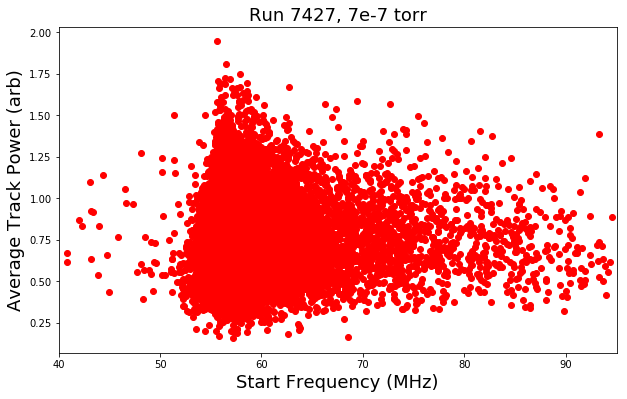

<Figure size 432x288 with 0 Axes>

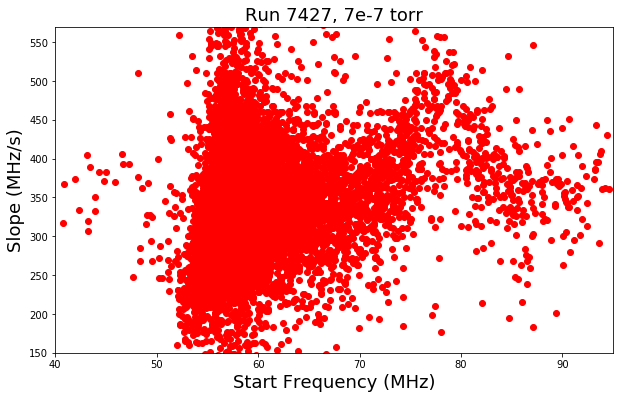

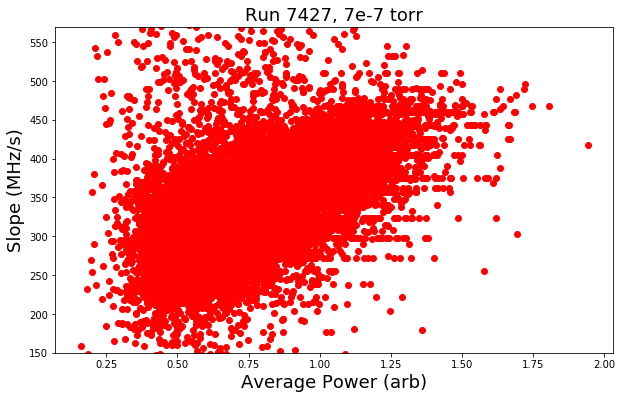

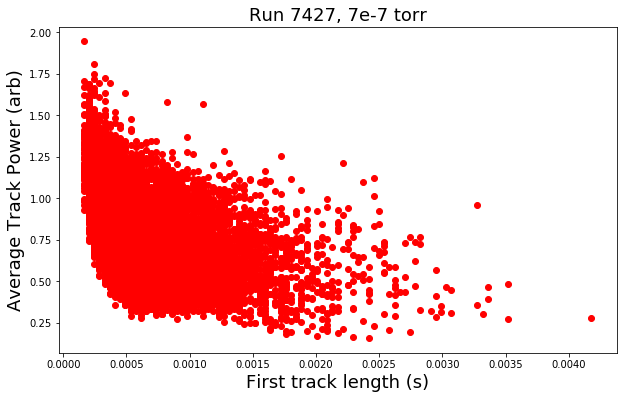

In [13]:
plt.figure(figsize=(10,6))
plt.title(conditions,fontsize=18)
plt.plot(startFrequencies*1e-6,firstTrackAveragePowers*1e8, 'ro')
plt.xlabel('Start Frequency (MHz)',fontsize=18)
plt.ylabel('Average Track Power (arb)',fontsize=18)
plt.xlim(40,95)
plt.show()
plt.savefig('Run_{}_AvgPowerVsStartFreq.png'.format(runnumber))

plt.figure(figsize=(10,6))
plt.title(conditions,fontsize=18)
plt.plot(startFrequencies*1e-6,firstTrackSlopes*1e-6, 'ro')
plt.xlabel('Start Frequency (MHz)',fontsize=18)
plt.ylabel('Slope (MHz/s)',fontsize=18)
plt.xlim(40,95)
plt.ylim(150,570)
plt.show()

plt.figure(figsize=(10,6))
plt.title(conditions,fontsize=18)
plt.plot(firstTrackAveragePowers*1e8,firstTrackSlopes*1e-6, 'ro')
plt.xlabel('Average Power (arb)',fontsize=18)
plt.ylabel('Slope (MHz/s)',fontsize=18)
plt.ylim(150,570)
plt.show()

plt.figure(figsize=(10,6))
plt.title(conditions,fontsize=18)
plt.plot(firstTrackTimeLengths,firstTrackAveragePowers*1e8, 'ro')
plt.xlabel('First track length (s)',fontsize=18)
plt.ylabel('Average Track Power (arb)',fontsize=18)
plt.show()